## 確率ロボティクス課題_2020 Q学習によるエージェントの行動決定
 #### 17C1091　田中宏征
 
 
 ### 課題内容
 将棋のようなマス目の中で，強化学習のアルゴリズムを用いて目的地に向かうエージェントのシミュレーションを作成

### 実装内容
#### 参考にしたコード
https://github.com/keigoshimizu/probability_Robotics_2020_kadai/blob/master/probability.ipynb

https://github.com/ryuichiueda/probrobo2017/blob/master/09.ipynb

https://github.com/ryuichiueda/probrobo2017/blob/master/09-2.ipynb

これらからマス目の作成方法と強化学習の一つであるQ学習のアルゴリズムを参考にし，ランダムでマス目の縦横のサイズが変わる(縦横どちらも2～8の間の数値を取る)マップの中で，さらにランダムに決まる目的地に，Q学習のアルゴリズムで向かうエージェントの動きを作成

In [ ]:
class Agent:
    def __init__(self):
        
        self.actions = ["up","down","left","right" ]
        self.pos = (0,0)
        
agent = Agent()

In [2]:
#coding: utf-8 
import random
size_x = random.randint(2, 8)
size_y = random.randint(2, 8)
size = 6

class State:
    def __init__(self, actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
    
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] = 0.0
        self.goal = True
        
        

        
states = [[State(agent.actions) for i in range(size_y)] for j in range(size_x)]
states[random.randint(1,size_x-1)][random.randint(1,size_y-1)].set_goal(agent.actions)

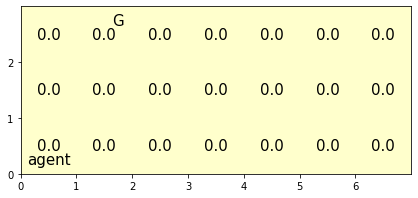

In [3]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches
import numpy as np

def draw(mark_pos):
    fig, ax = plt.subplots(figsize=(7,7))
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size_y)] for i in range(size_x)]
    mp = ax.pcolor(np.array(values).T, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size_x), minor=False)
    ax.set_yticks(range(size_y), minor=False)
 
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5  ,y + 0.5 ,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=15)
            if states[x][y].goal:
                plt.text(x+0.75 ,y+0.75 ,"G",ha = 'center', va = 'center', size=15)
    
    plt.text(agent.pos[0]+0.5  ,agent.pos[1] + 0.25 ,"agent",ha = 'center', va = 'center', size=15)

    if mark_pos == "all":   
        for x in range(size_x):
            for y in range(size_y):
                if states[x][y].goal: continue
                plt.text(x +0.5,y + 0.25,states[x][y].best_action,ha = 'center', va = 'center', size=15)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0] + 0.5,mark_pos[1] + 0.5,s.best_action,ha = 'center', va = 'center', size=15)
        
    plt.show()
    fig.clear()
    
draw(None)

In [4]:
import random

def state_transition(s_pos,a):
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
   
    if x < 0:       x = 0
    elif x >= size_x: x = size_x-1
    if y < 0:       y = 0
    elif y >= size_y: y = size_y-1 
    
    return (x,y)

In [5]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: 
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

s:(4, 0)　a:up s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':u

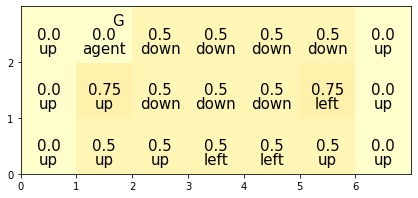

s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


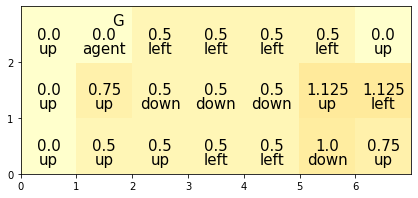

s:(6, 1)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


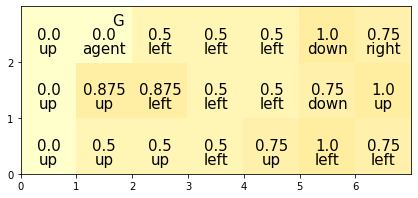

s:(0, 2)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


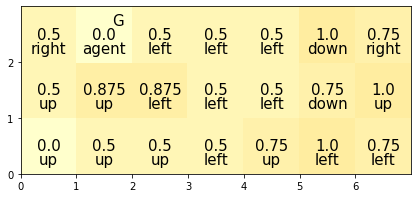

s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:l

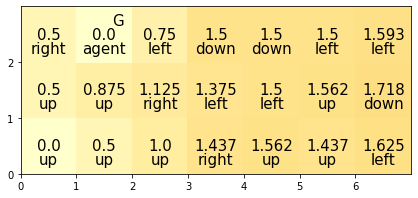

s:(0, 0)　a:up s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up

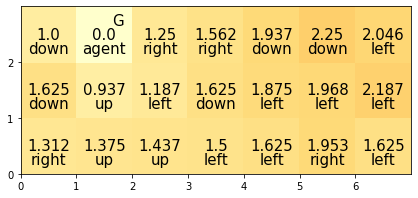

s:(4, 1)　a:right s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 0) a':left
----
s:(4, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':d

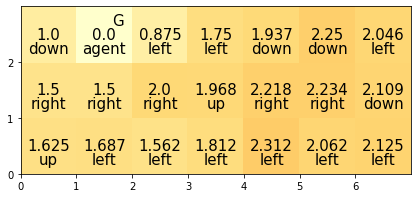

s:(4, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


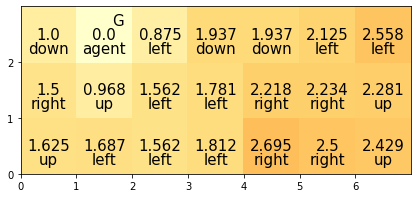

s:(3, 2)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


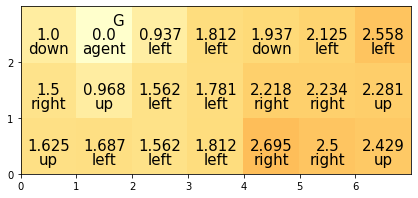

s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


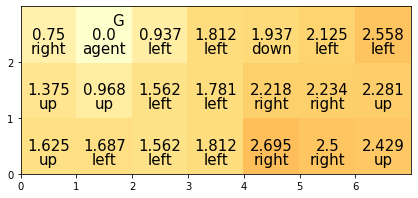

s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':left
----
s:(3, 0)　a:left s':(3, 0) a':right
----
s:(3, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:ri

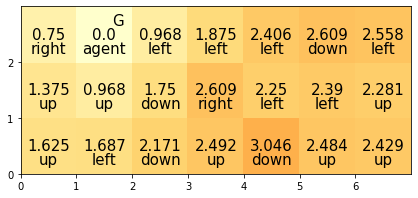

s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


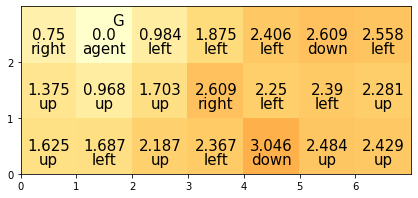

s:(5, 2)　a:left s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


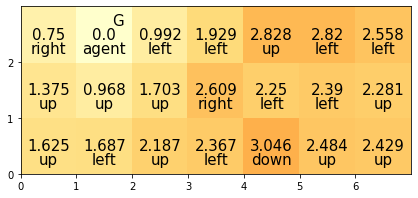

s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


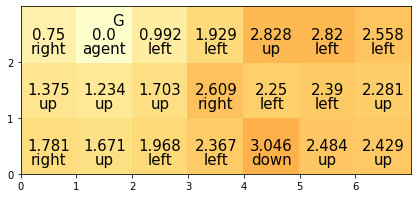

s:(3, 2)　a:right s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


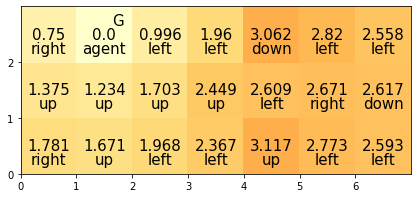

s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


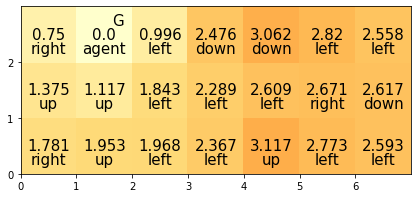

s:(5, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':right
----
s:(5, 1)　a:right s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6,

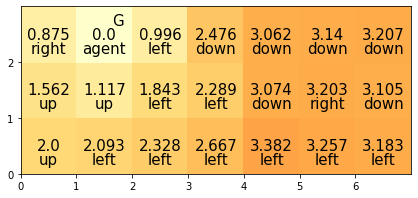

s:(0, 0)　a:right s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


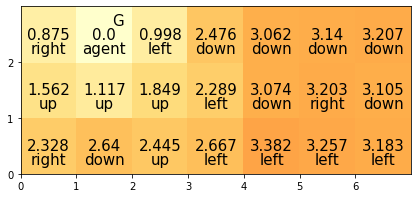

s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


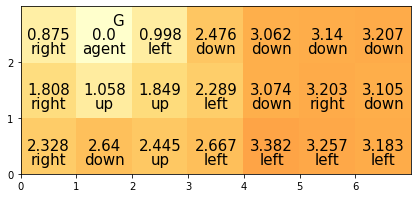

s:(1, 1)　a:up s':(1, 2) a':up
----


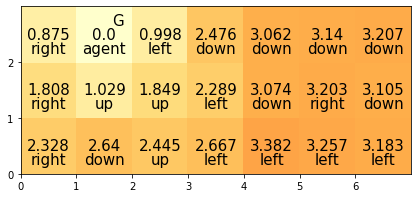

s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':left
----


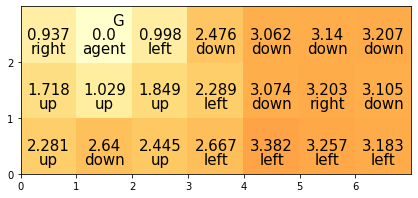

s:(2, 2)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


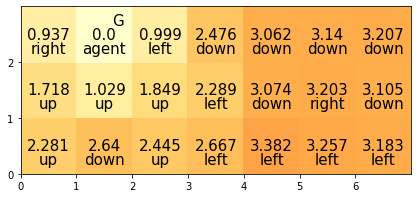

s:(3, 0)　a:up s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':left
----
s:(3, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':down
----


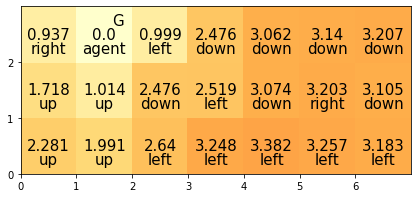

s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


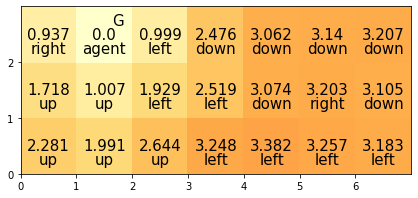

s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


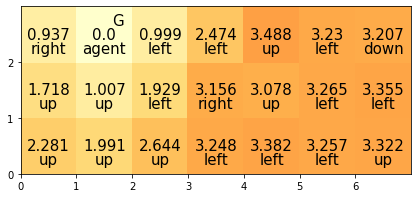

s:(5, 2)　a:down s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':righ

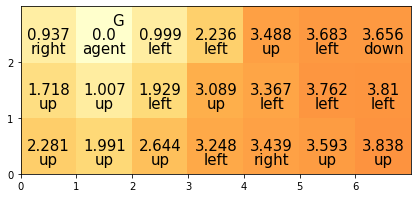

s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


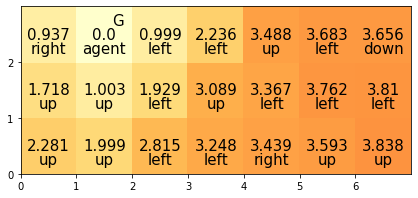

s:(0, 2)　a:right s':(1, 2) a':up
----


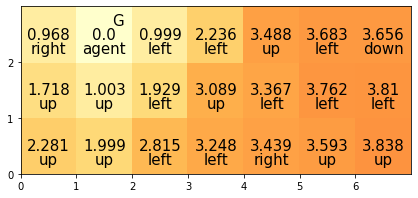

s:(6, 2)　a:left s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':righ

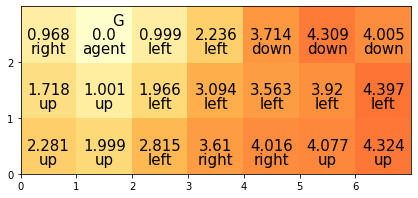

s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':down
----


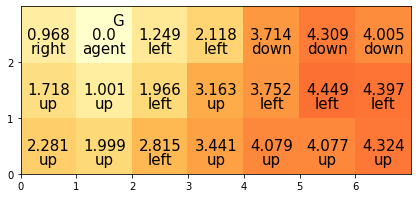

s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':left
----


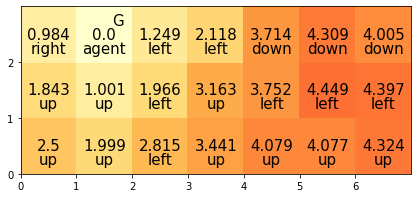

s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


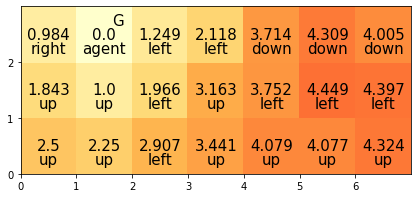

s:(5, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


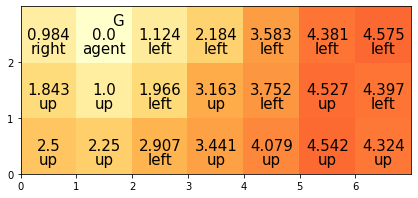

s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


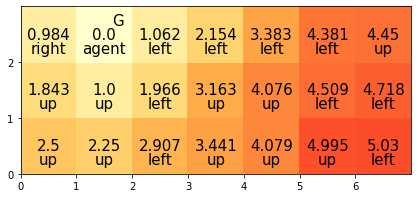

s:(1, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


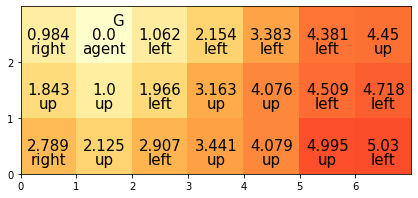

s:(6, 1)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':right
----
s:(2, 2)　a:right s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a

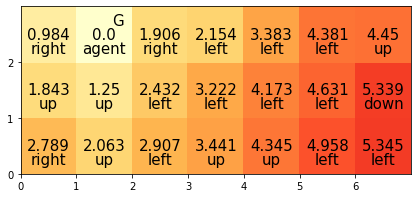

s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


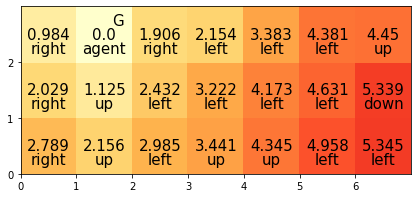

s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


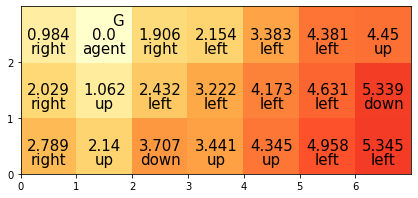

s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


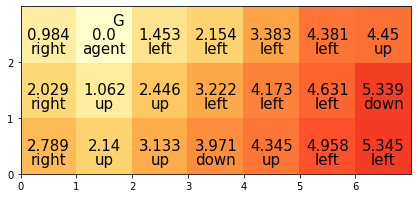

s:(6, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


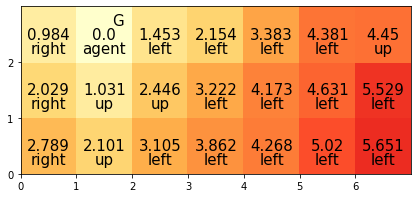

s:(3, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


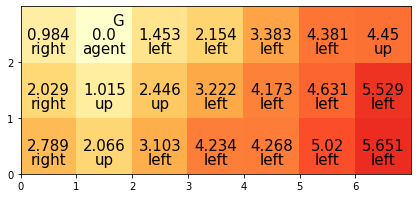

s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


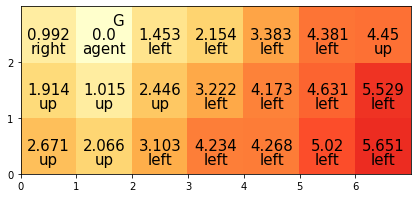

s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


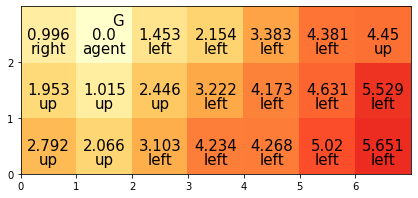

s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


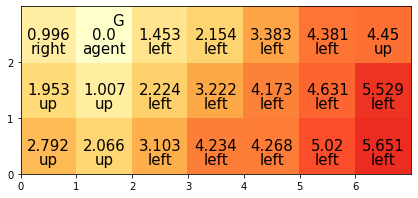

s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


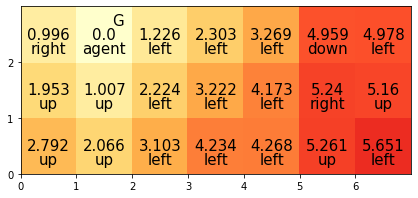

s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


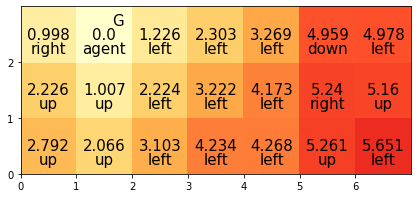

s:(6, 0)　a:up s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


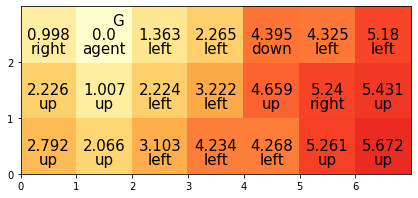

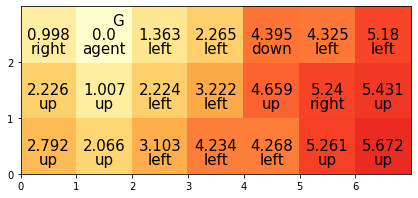

s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


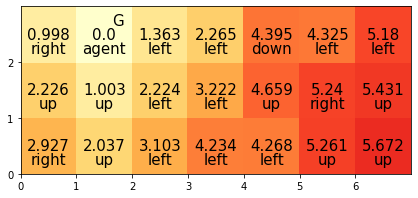

s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':left
----
s:(4, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':right
----


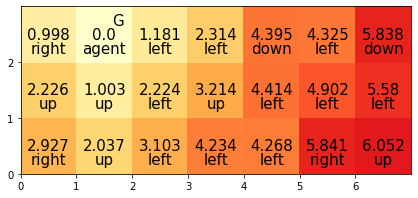

s:(3, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


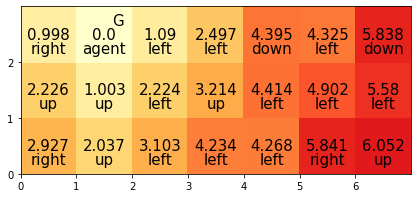

s:(2, 0)　a:left s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


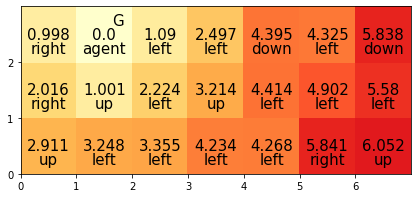

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


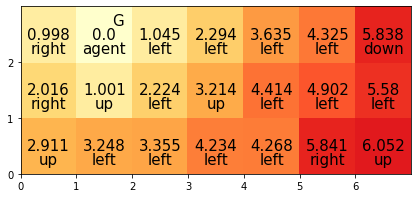

s:(0, 2)　a:right s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


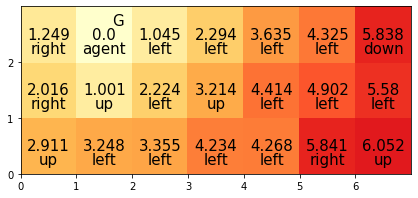

s:(2, 0)　a:up s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


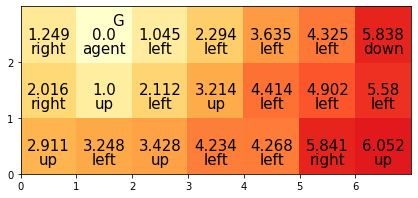

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':down
----


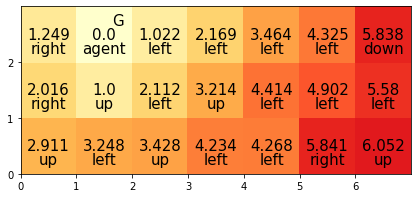

s:(3, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


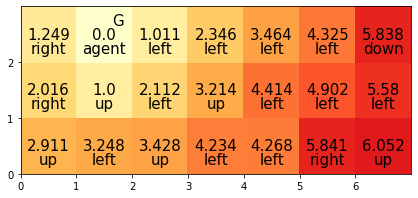

s:(2, 1)　a:left s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


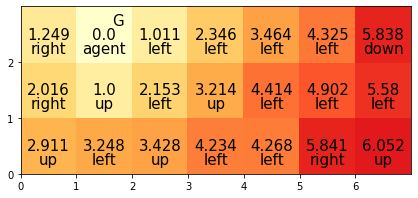

s:(5, 2)　a:left s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


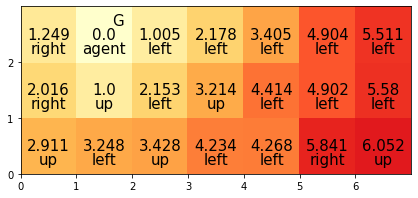

s:(0, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


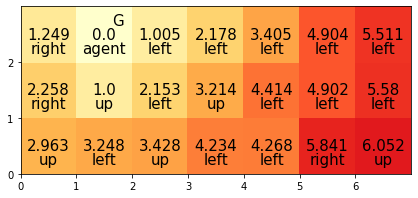

s:(0, 0)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


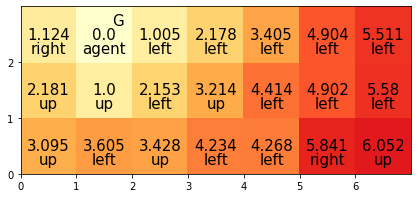

s:(0, 2)　a:right s':(1, 2) a':up
----


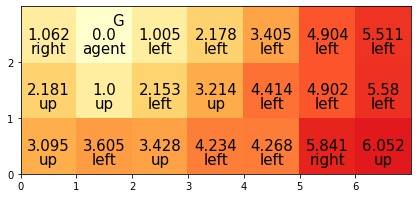

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


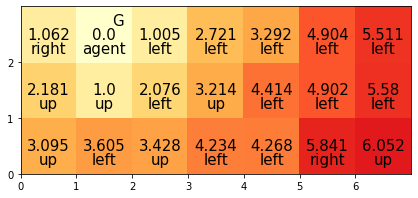

s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


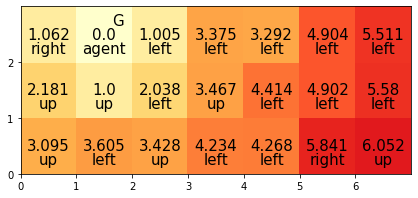

s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----


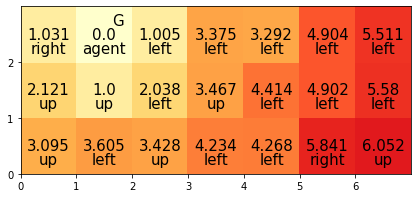

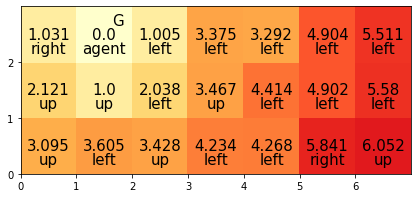

s:(6, 2)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


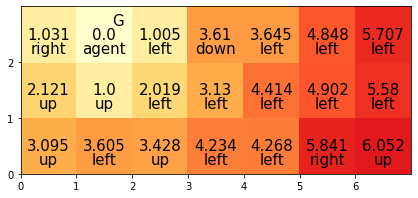

s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


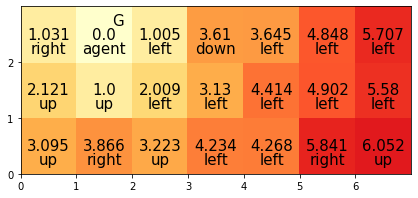

s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


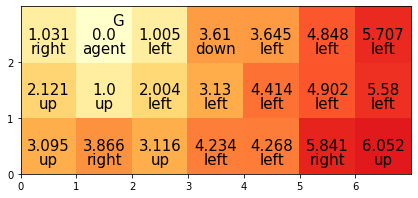

s:(0, 0)　a:up s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


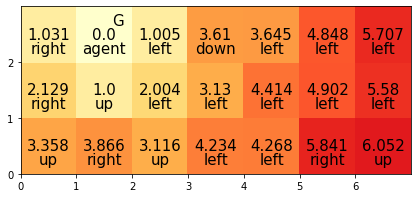

s:(4, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


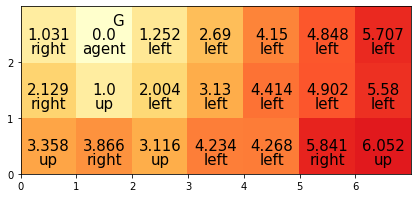

s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


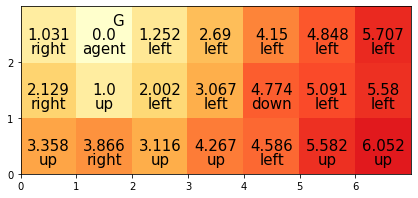

s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


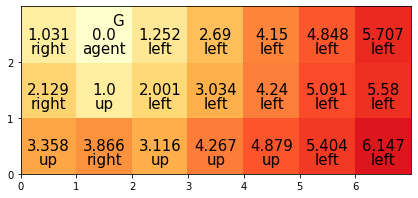

s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


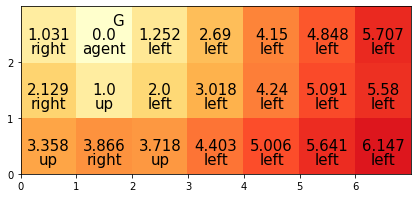

s:(6, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


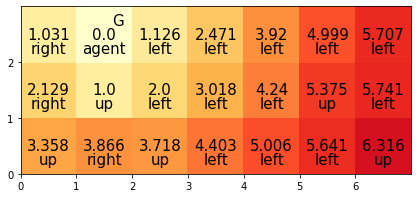

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


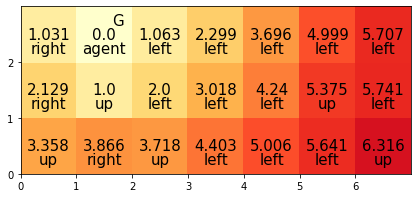

s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


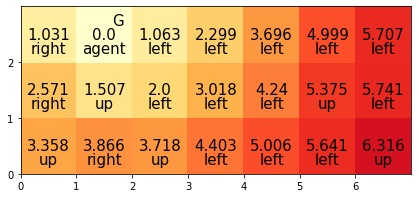

s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


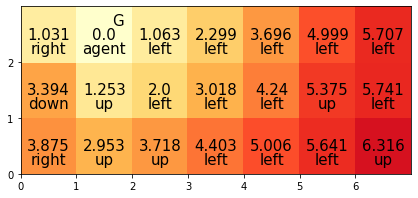

s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


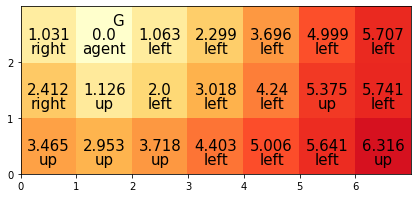

s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


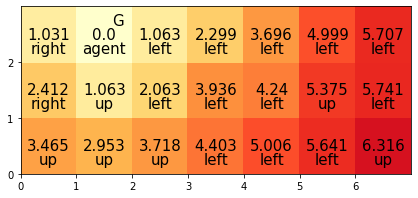

s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


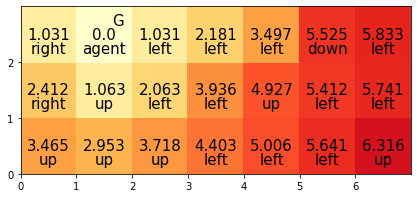

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


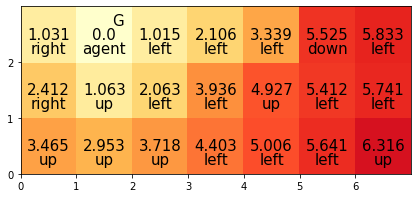

s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


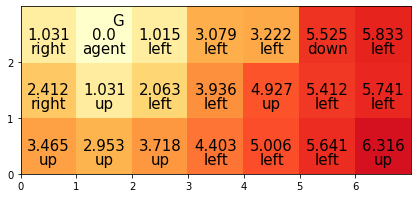

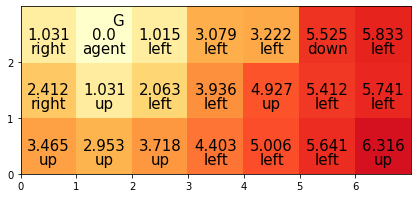

s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


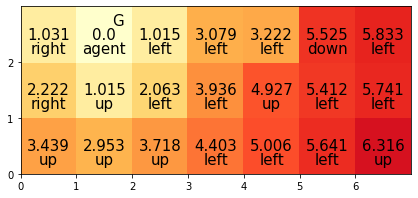

s:(6, 0)　a:left s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


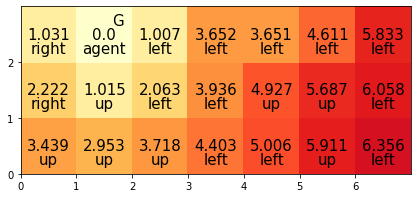

s:(3, 1)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


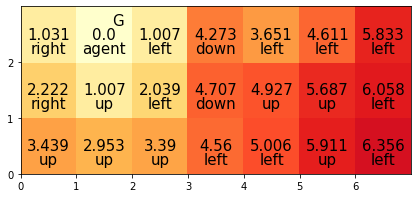

s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


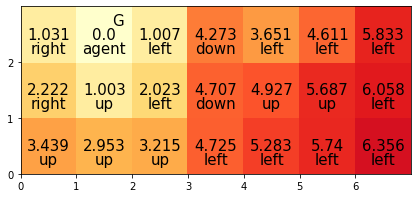

s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


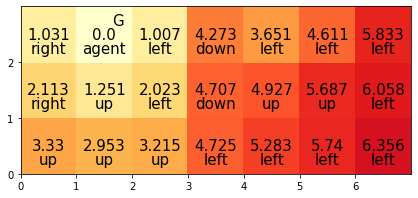

s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


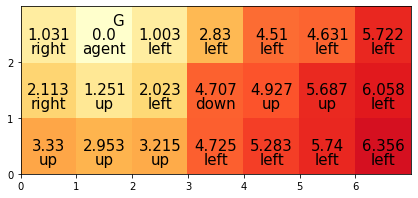

s:(0, 1)　a:right s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


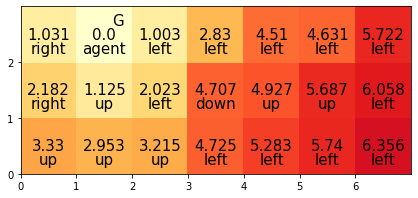

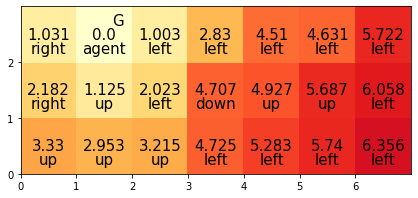

s:(4, 2)　a:down s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


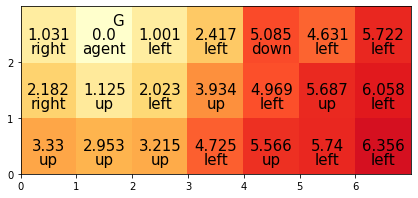

s:(4, 1)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


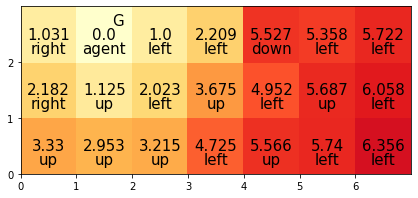

s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


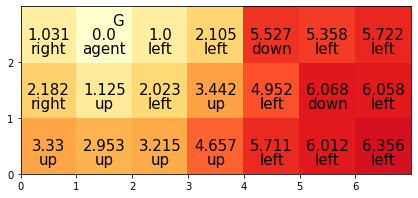

s:(0, 2)　a:right s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':down
----


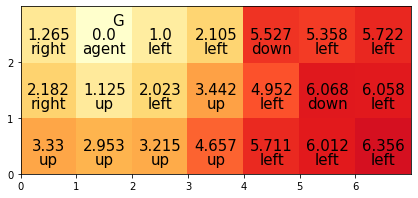

s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


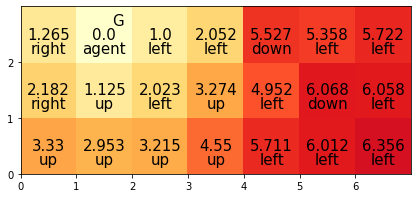

s:(6, 1)　a:up s':(6, 2) a':left
----
s:(6, 2)　a:left s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----


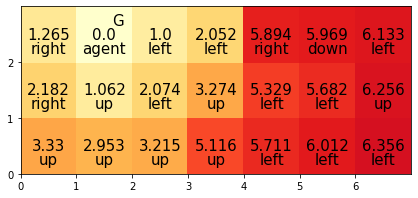

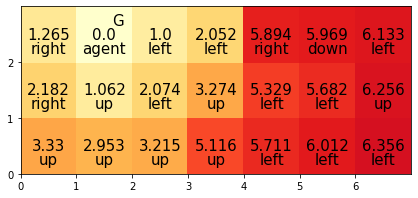

s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----


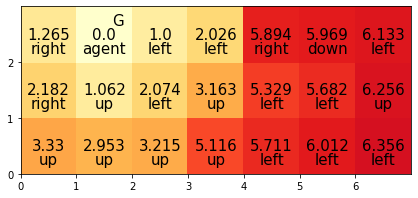

In [6]:
alpha = 0.5
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size_x),random.randrange(size_y))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
    
          
    while True:

        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
import copy
f_states = copy.deepcopy(states)
for i in range(100):
    one_trial()
    draw("all")